## Marketing Sales Data: Evaluate Simple Linear Regression

### Introduction

Simple Linear Regression is used to explore relationship between two continuous variables. 
Simple linear regression analysis includes: 
- creating and fitting a model
- checking model assumptions
- analyzing model performance
- interpreting model coefficients
- communicating results

### Scenario

Analytics teams are assigned to provide insights about marketing and sales. In this case, the project focuses on the use of influencer marketing, and we have to explore the relationship between `marketing promotional budget` and `sales`.

The dataset provided includes information about marketing campaigns accross TV, radio and social media as well as how much revenue in sales was generated from these campaigns.

The leaders of the company will make decisions about where to focus future marketing efforts, so it is crucial to have an understanding of the relationship between the different types of marketing and the revenue they generated. 

In [1]:
### import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### import statsmodel module and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
### load the dataset
data = pd.read_csv("E:\Portfolio Data\Dummy Data HSS.csv")
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
### explore the size of the data
data.shape

(4572, 5)

#### Explore Independent Variables

From the data it has 5 columns and 4572 rows. There are 3 continuous independent variables, which are `TV`, `Radio`, and `Social Media`.  We will see how heavily the business invests in each promotion type by using descriptive statistics.

In [6]:
data[['TV', 'Radio', 'Social Media']].describe()

,TV,Radio,Social Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


The descriptive statistics looks nice, the `mean` and `median` values of the 3 variables seems reasonable. Indicating there is no outlier. Let's drop the influencer data since it's a string data that we don't use for regression analysis.

In [7]:
data = data.drop('Influencer', axis=1)
data.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


#### Explore dependent variable

`Sales` is our dependent variable, and its values must exist in every independent variables in order to fitting the model. So, we will calculate the percentage of missing values in the `Sales` column and then we just drop the null values in the `Sales` columns.

In [8]:
missing_sales = data['Sales'].isna().mean()
missing_sales = round(missing_sales*100,2)

print('Percentage of promotion missing sales: ' + str(missing_sales) + '%')

Percentage of promotion missing sales: 0.13%


In [9]:
data = data.dropna(subset=['Sales'], axis=0)

#### Visualize dependent variable

Text(0.5, 1.0, 'Distribution of Sales')

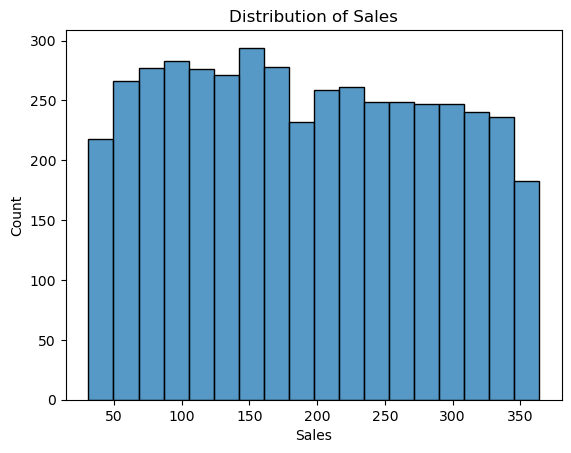

In [10]:
### create histogram of sales

fig = sns.histplot(data['Sales'])
fig.set_title('Distribution of Sales')

The `Sales` distribution is almost uniform ranging from 25-350 million dollars.

#### Model Building

First, creating a pairplot to visually determine which variable has the strongest linear relationship with `Sales`. This will help to determine the `X` variable for the simple linear regression.

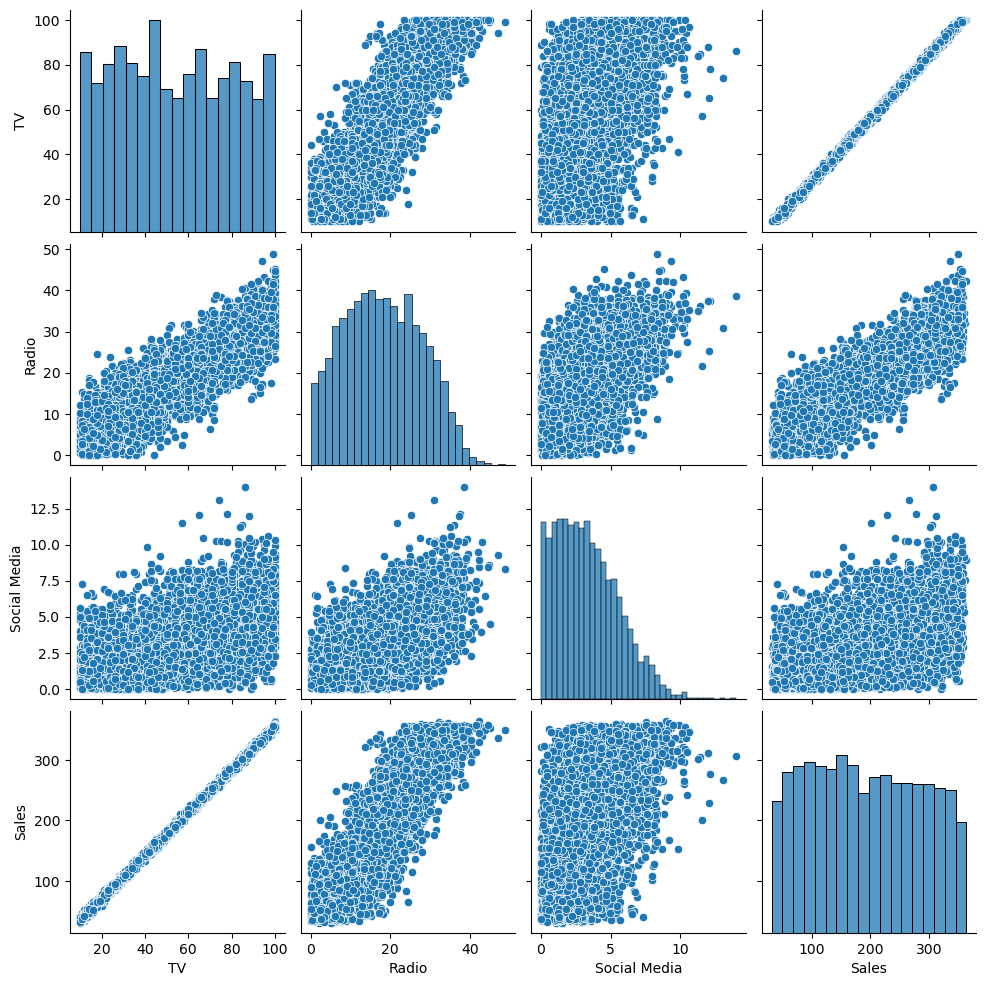

In [11]:
sns.pairplot(data)

#### Conclusion: 
`TV` as the `X` variable as it shows the tightest relationship with Sales. Radio and Social media has a lot of variance shown by points outside the line.

#### Build and fit the model

In [12]:
### Define the OLS formula

ols_formula = 'Sales ~ TV'

### Create an OLS model

OLS = ols(formula=ols_formula, data=data)

### Fit the model

model = OLS.fit()

### Save the results summary

model_results = model.summary()

### Display the model results
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:19:19   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:
- Linearity
- Independent observations
- Normality
- Homoscedasticity

### 1. Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. In this case `X` = `TV` and `y` = `Sales`.

<Axes: xlabel='TV', ylabel='Sales'>

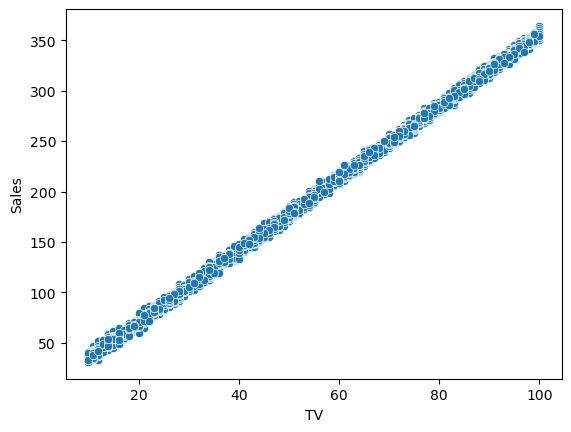

In [13]:
sns.scatterplot(x=data['TV'], y=data['Sales'])

The plot shows that `TV` and `Sales` has a straight line with positive correlation. So, the linearity assumption is met.

### 2. Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independent observation is not violated.

### 3. Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:
- **Plot 1:** Histogram of the residuals
- **Plot 2:** Q-Q Plot of the residuals

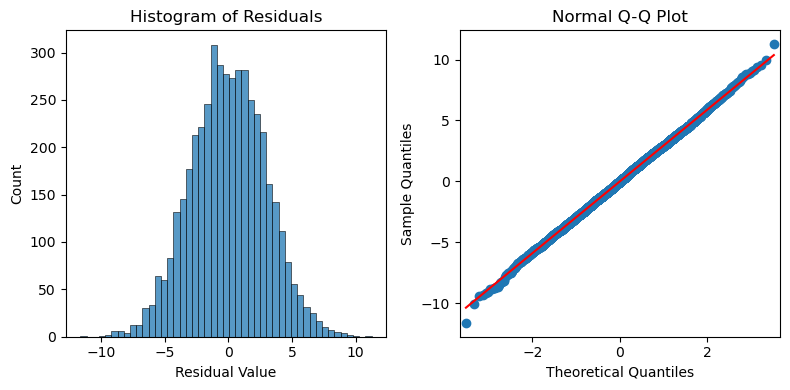

In [15]:
### Calculate the residuals

residuals = model.resid

### Create a 1x2 plot figures

fig, axes = plt.subplots(1, 2, figsize=(8,4))

### Create a histogram with the residuals

sns.histplot(residuals, ax=axes[0])

### Set the x label of the residual plot

axes[0].set_xlabel("Residual Value")

### Set the title of the residual plot
axes[0].set_title("Histogram of Residuals")

### Create a Q-Q plot for the residuals

sm.qqplot(residuals, line='s', ax=axes[1])

### Set the title of the Q-Q plot
axes[1].set_title("Normal Q-Q Plot")

### Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance

plt.tight_layout()

### Show the plot
plt.show()

Based on histogram of the residuals, the residuals are normally distributed. In addition, Q-Q plot of residuals also shows a linear line. Both these results show that the normality assumption is met. 

### 4. Model assumption: Homoscedasticity

The **homoscedasticity (constance variance) assumption** is that the residuals have a constant variance for all values of `X`.
Check this assumption is not violated by creating a scatterplot with the fitted values and residuals.
Add a line y = 0 to visualize the variance of the residuals above and below y = 0.

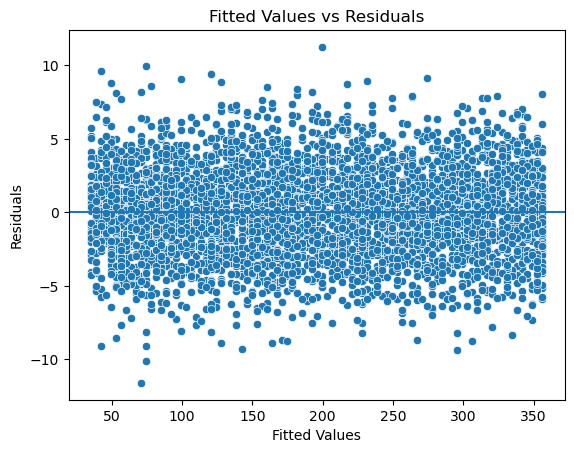

In [17]:
### Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values vs Residuals")
fig.axhline(0)
plt.show()

The points form random clouds. The variance and residuals is consistent across all X. Hence, the assumption of homoscedasticity is met.

#### Results and Evaluation

In [18]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:19:19   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared(R^2) measures the proportion of `y` variable explained by the `X` variable. The value is 0.999 or 99.9%, which means that `TV promotion budget` explains the 99.9% of the variation in `Sales`.

#### Model Interpretations

Based on the model, the equation of linear regression between TV promotion budget and Sales can be written as:

**`Sales (in millions)` = 3.5614* `TV promotion budget (in millions)`- 0.1263**

Meaning that an increase of one million TV promotion budget will increase the Sales in approximately 3.5614 million dollars.

#### Model Uncertainty

Since model coefficients are estimated, so there is amount of uncertainty. In this case, a p-value and 95% of confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate. 

From the result, we see that when `TV` as independent variable, it has p-value of 0.000 and a 95% of confidence interval of [3.558 , 3.565], which means that there is a 95% chance the interval [3.558 , 3.565] contains the true parameter of the slope. This indicating a little uncertainty to the value of slope (3.5614). Since the slope still in the range of confidence interval, therefore the business can be confident in the impact `TV promotion budget` has on `Sales`.

#### Business Recommendation

Based on the result, we can see that of the three variables (TV, Radio and Social Media), TV has the strongest positive linear relationship with Sales. According to the model, an increase of 1 million dollars in TV budget, will result an estimated 3.5614 million dollars or more of Sales. This is a confident estimate since the p-value is so small which is 0.000 and high coefficient determination (0.999). Hence, the business should prioritize increasing TV promotional budget among other variables to increase sales.